# Install Komponen Pendukung

In [1]:
!pip install matplotlib==3.6.3

  Using cached matplotlib-3.6.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2


In [2]:
!pip install sidetable

In [34]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 646.9 kB/s eta 0:00:00


# Import Libraries dan Load data

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings    
import statistics
import sidetable as stb
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure
from statistics import mode
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url='https://drive.google.com/file/d/1wWwSjBgaQWKkbjeEJUQM7UJsZj2w0oys/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [5]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Deskripsi Dataset

**Dataset**

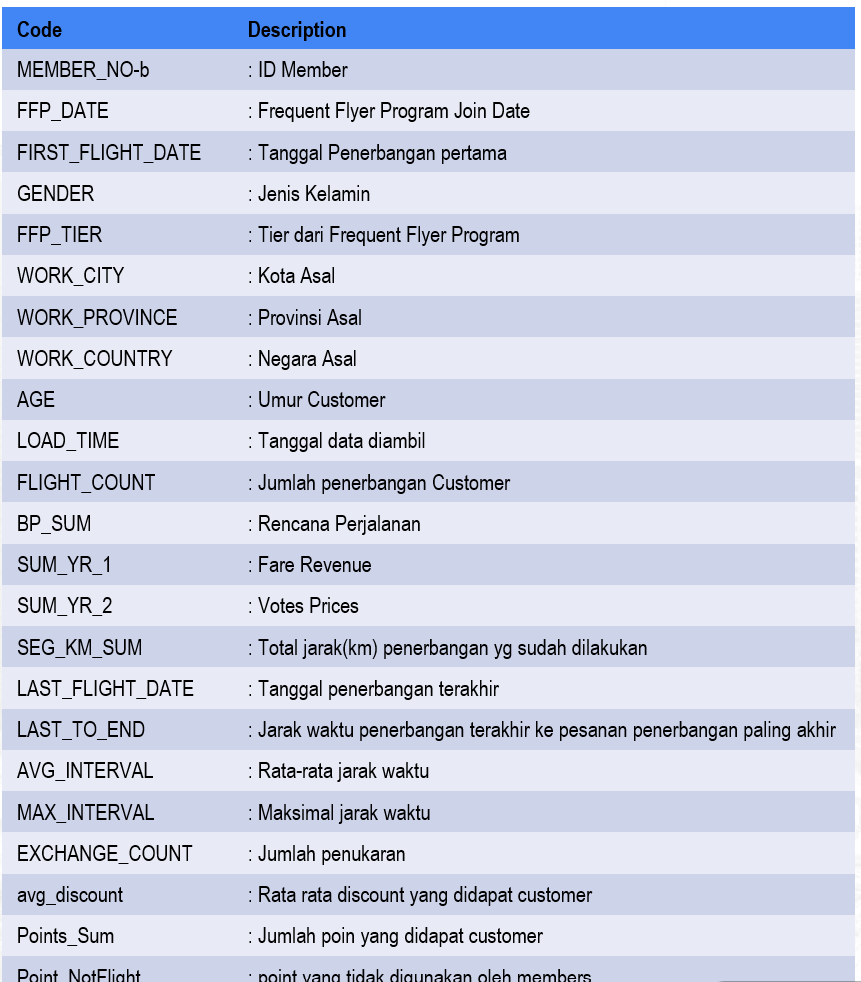

# EDA

**1. Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering (20 poin)**

- a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong,
bebas dari duplikat, dan berada di range value yang tepat

- b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi
setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

- c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain


**A.1. Data Type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Intepretasi**

Seluruh data type yang berjeniss tanggal masih memiliki tipe data object yang seharusnya merupakan datetime agar bisa digunakan pada modelling. Hal ini akan difix di bagian preprocessing.

**A.2. Cek Missing Value**

In [7]:
# cek missing value beserta presentasenya
counts = df.isna().sum().sort_values(ascending=False)

percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["Missing Value", "%"])
null

,Missing Value,%
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


**Intepretasi**

- Terdapat beberapa kolom yang memiliki missing value yakni yaitu: `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, dan `SUM_YR_2`."

- Karena presentase missing value pada tiap kolomnya dibawah 10% maka penanganannya kami lakukan dengan mengimputasi data median untuk nilai data numerik dan modus untuk data kategorikal yang dilakukan di bagian preprocessing.

**A.3. Cek Duplicated Data** 

In [8]:
# Cek data duplikat
df.duplicated().sum()

0

**Intepretasi**

Tidak ada kolom yang memiliki data duplikat

**A.4. Range value yang tepat**

**Untuk Range value yang jelas dapat dilihat pada distribusi persebaran outliers di B.2.**

**B.1.Keluarkan kolom statistik baik numerikal dan kategorikal**

**Data Numerikal**

In [9]:
# Grouping fitur bertipe numerik
nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns

#Menampilkan kolom stastik fitur numerik 
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Data Kategorikal**

In [10]:
#Grouping fitur bertipe Kategorik
cats = df.select_dtypes(exclude=[np.number]).columns

#Menampilkan kolom stastik fitur kategorik

df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


**B.2.Bentuk Distribusi Tiap Kolom Numerik**

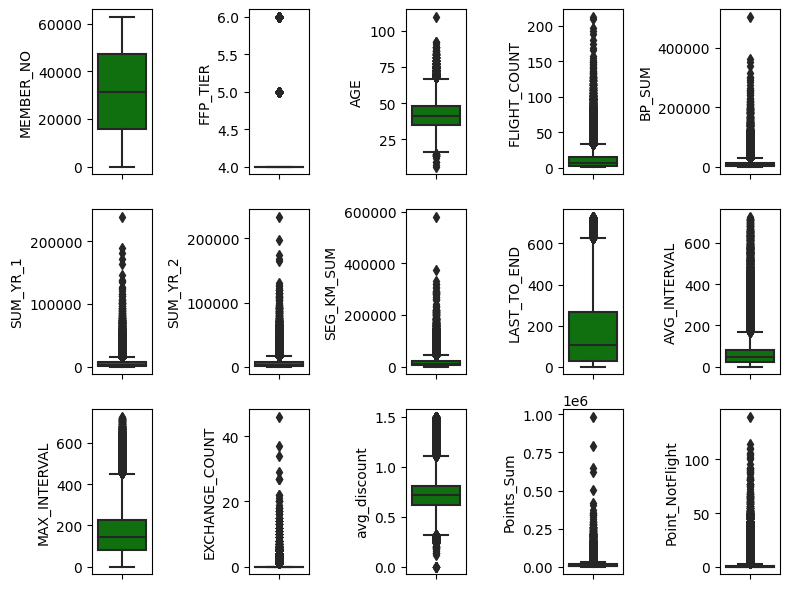

In [12]:
# Distribus Outliers pada kolom numerik dengan Boxplot

plt.figure(figsize=(8, 6))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green')
    plt.tight_layout()

**Intepretasi**

Berdasarkan distribusi data outliers dapat dilihat bahwa ada Setiap kolom bertipe numerik yang melebihi range value yang ada. Hal ini nantinya akan di fix di preprocessing pada bagian handle outliers.

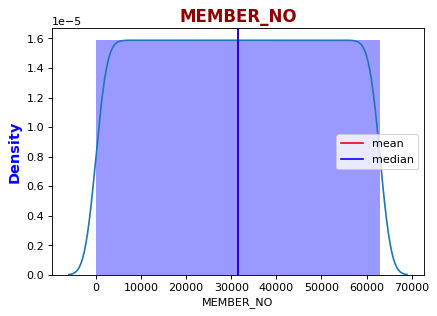

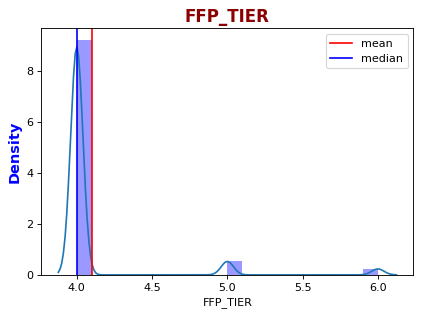

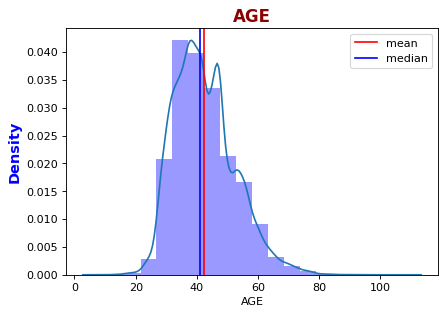

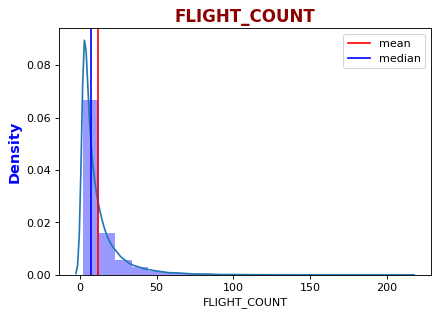

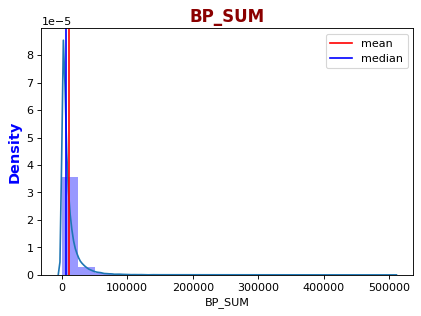

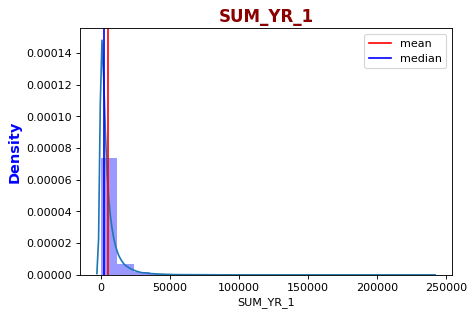

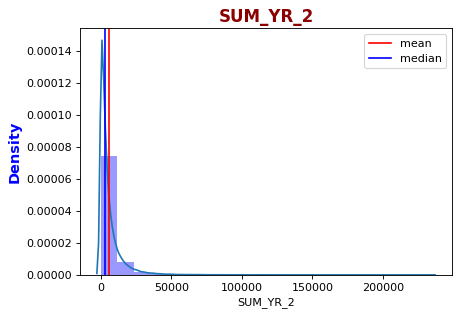

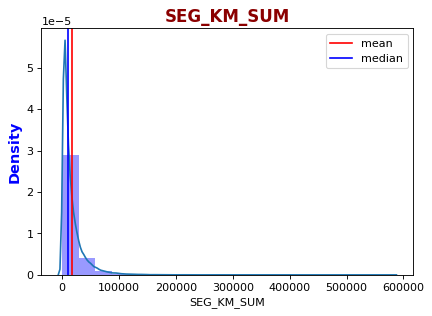

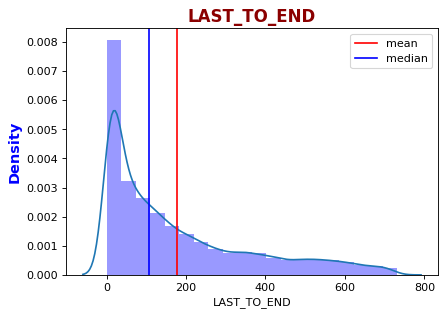

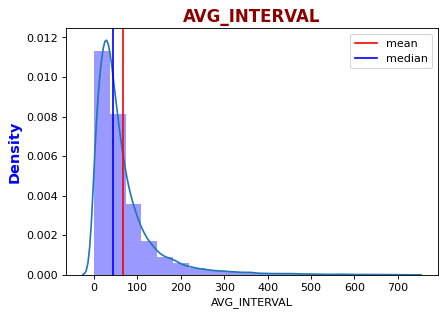

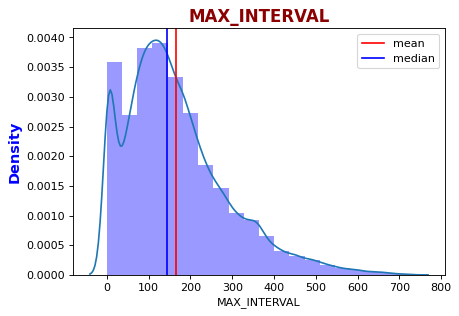

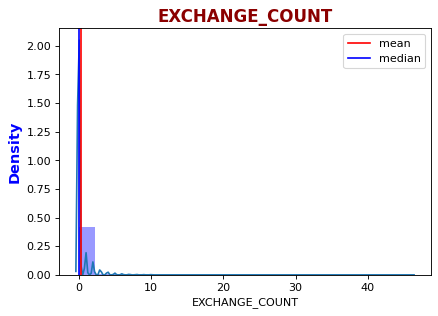

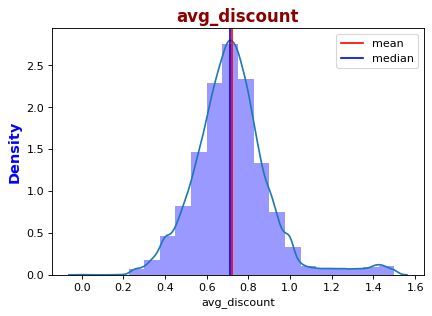

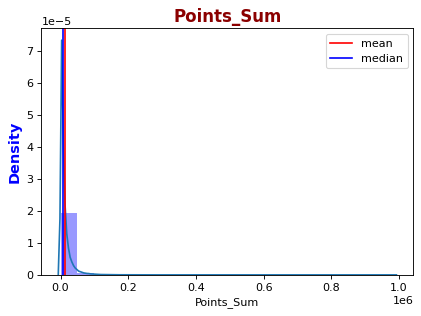

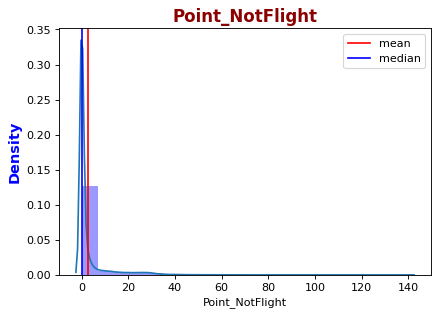

In [14]:
# Distribusi data numerik berdasarkan skewnessnya dengan displot
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "blue", "weight" : "bold", "size" : 13}

for i in list(nums):
    plt.figure(figsize = (6, 4), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, color = "blue"), bins = 20)
    
    plt.axvline(df[i].describe()['mean'], color = 'red', label = 'mean')
    plt.axvline(df[i].describe()['50%'], color = 'blue', label = 'median')
    
    
    plt.title(i, fontdict = title_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.legend()
    plt.show()

In [15]:
# Mengecek tingkat kemiringan distribusi data numerik dengan skewness score
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df[nums].columns[i]} : {df[nums[i]].skew()}")

Skewness MEMBER_NO : 1.320446898451163e-18
Skewness FFP_TIER : 3.873290798403592
Skewness AGE : 0.6259513251721389
Skewness FLIGHT_COUNT : 3.2153051579474066
Skewness BP_SUM : 5.660472851669501
Skewness SUM_YR_1 : 5.08803464862269
Skewness SUM_YR_2 : 4.601346426980965
Skewness SEG_KM_SUM : 3.884612209921392
Skewness LAST_TO_END : 1.1780712396622304
Skewness AVG_INTERVAL : 3.2073754731768838
Skewness MAX_INTERVAL : 1.073332581841645
Skewness EXCHANGE_COUNT : 8.199608074047509
Skewness avg_discount : 0.9567933070018152
Skewness Points_Sum : 8.38389682680554
Skewness Point_NotFlight : 4.270491906667679


**Intepretasi**

- Hampir setiap kolom numerik, kecuali kolom No_Member bersifat positively skew karena mean > median dan plot menjorok ke kanan.

- Hampir semua kolom kecuali kolom AGE dan avg_discount memiliki distribusi data highly skew. Sedangkan kolom Age dan avg_discount memiliki distribusi data moderately_skew. 

- Persebaran data skew yang tinggi ini diakibatkan masih banyaknya kerusakan data mulai dari banyaknya missing value hingga outliers. Kemungkinan sebaran data akan baik setelah berbagai masalah tersebut diselesaikan dalam bagian preprocessing.



**B.3.Jumlah baris untuk setiap unique value fitur kategorikal**

In [16]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [17]:
# Penjabaran tiap-tiap Unique Value fitur kategorikal
for col in cats:
    print(f'''Unique value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Unique value count kolom FFP_DATE:
--------------------------------------------------
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Unique value count kolom FIRST_FLIGHT_DATE:
--------------------------------------------------
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Unique value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Unique value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI  

**Intepretasi**

Berdasarkan baris dapat dilihat bahwa unique valie terbanyak adalah First_FLIGHT_DATE dan yang paling sedikit adalah Load_Time

**C.Korelasi antar tiap-tiap kolom**

<AxesSubplot: >

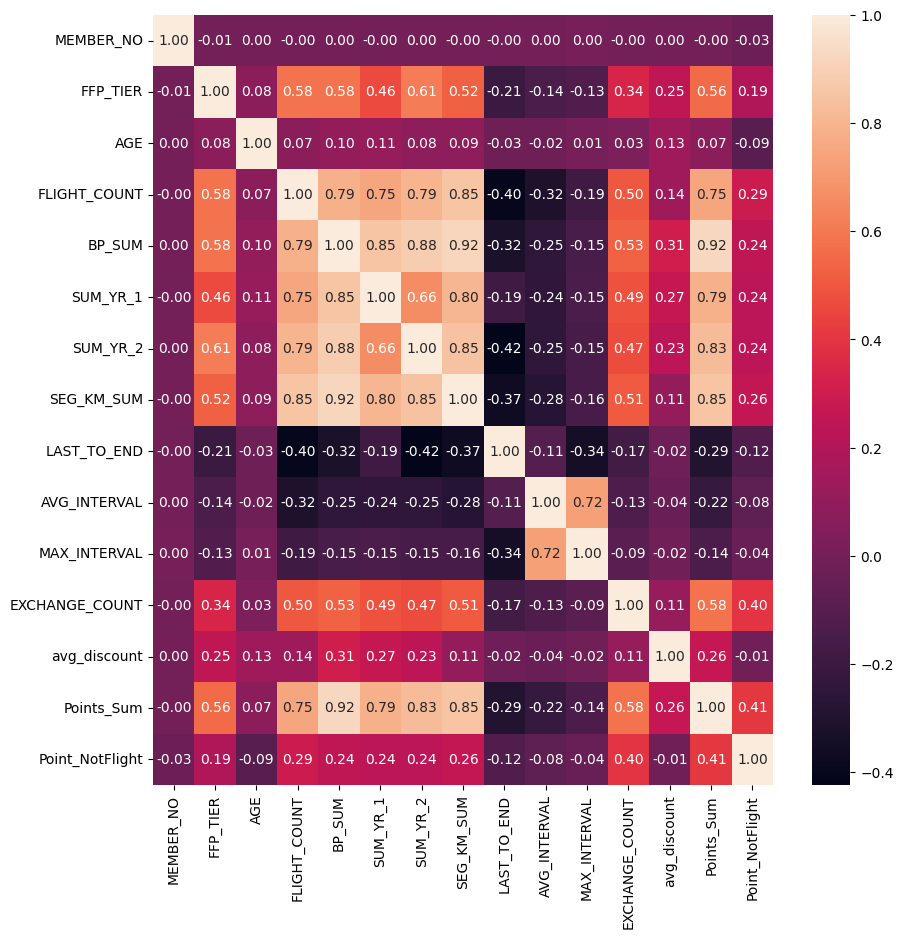

In [19]:
# Correlation menggunakan Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Intepretasi**

Berdasarkan heatmap terdapat beberapa fitur yang memiliki korelasi tinggi satu dengan lainnya :


- Antar feature  `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`

- Feature `AVG_INTERVAL` dengan `MAX_INTERVAL`

- Feature  `FLIGHT_COUNT`, `BP_SUM`,`SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` sangat berkorelasi satu sama lain.Hal ini berarti Semakin sering pelanggan membeli atau terbang, semakin jauh jarak penerbangan yang ditempuh dan semakin banyak pendapatan tarif.



# Preprocessing dan Feature Engineering

**2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!  (20 poin)**

Langkah-langkah:

- a.	Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.
- b.	Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).


**2.b.1. Preprocessing**

**Handling Missing Value dengan mengimputasi data dengan median dan modus**

In [20]:
# Menghandling missing value dengan melakukan imputasi data

# data numerikal dengan median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

# data kategorik dengan modus
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['WORK_CITY'] = df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0])
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0])
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0])

In [21]:
# Melihat hasil handling missing value

counts = df.isna().sum().sort_values(ascending=False)

percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
MEMBER_NO,0,0.0
SUM_YR_1,0,0.0
Points_Sum,0,0.0
avg_discount,0,0.0
EXCHANGE_COUNT,0,0.0
MAX_INTERVAL,0,0.0
AVG_INTERVAL,0,0.0
LAST_TO_END,0,0.0
LAST_FLIGHT_DATE,0,0.0
SEG_KM_SUM,0,0.0


**Handling Outlier dengan Z- Score**

In [22]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Baris sebelum melakukan Handling Outlier = {len(df)}')

handling_outlier = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    handling_outlier = (zscore < 3) & handling_outlier
    
df = df[handling_outlier] 

print(f'Total Baris setelah melakukan Handling Outlier = {len(df)}')

Total Baris sebelum melakukan Handling Outlier = 62988
Total Baris setelah melakukan Handling Outlier = 54306


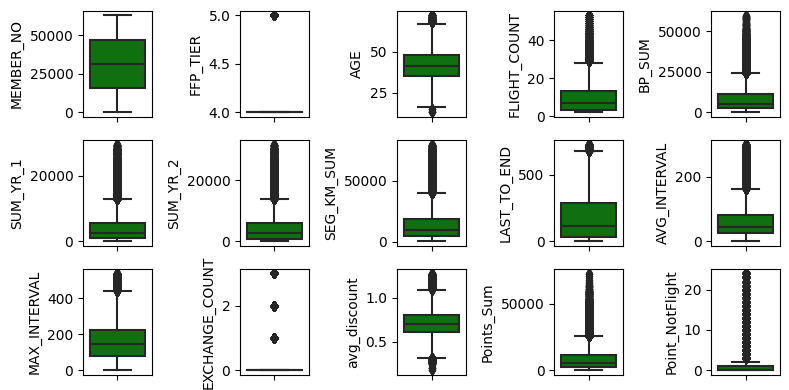

In [23]:
# Tampilan boxplot setelah handling outlier
nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns

plt.figure(figsize=(8, 4))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green')
    plt.tight_layout()

**Dropping Column yang tidak berhubungan dengan clustering**

In [24]:
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

**Fix Data type Datetime**

In [25]:
# Menghapus record yang berhubungan dengan tanggal 2014/2/29 karena tidak ada tanggal 29 pada tahun itu karena kabisat
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [26]:
# Mengubah setiap kolom tanggal menjadi tipe data datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# inisialisasi
for col in date_feature:
  df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')


# Cek apakah sudah berubah atau belum
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53941 entries, 1028 to 62979
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           53941 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  53941 non-null  datetime64[ns]
 2   FFP_TIER           53941 non-null  int64         
 3   LOAD_TIME          53941 non-null  datetime64[ns]
 4   FLIGHT_COUNT       53941 non-null  int64         
 5   BP_SUM             53941 non-null  int64         
 6   SUM_YR_1           53941 non-null  float64       
 7   SUM_YR_2           53941 non-null  float64       
 8   SEG_KM_SUM         53941 non-null  int64         
 9   LAST_FLIGHT_DATE   53941 non-null  datetime64[ns]
 10  LAST_TO_END        53941 non-null  int64         
 11  AVG_INTERVAL       53941 non-null  float64       
 12  MAX_INTERVAL       53941 non-null  int64         
 13  EXCHANGE_COUNT     53941 non-null  int64         
 14  avg

**2.a. Feature Selection beserta alasan memilihnya**

Kami pada saat ini bertujuan untuk membuat klasterisasi berdasarkan customer lifetime value (CLV). Menurut Siti Monalisa (2017)  kita dapat melihat Customer Lifetime Value dengan mengelompokkan customer berdasarkan LRFMC Model. LFRMC model sendiri terdiri dari beberap komponen yakni :

- **L (Loyalty / Length)** : Seberapa lama customer menjadi membership. Hal ini dapat diketahui dari selisih waktu awal menjadi membership hingga tidak menjadi membership.

- **R (Recency)** : Jumlah bulan atau waktu  penerbangan yang telah dilakukan oleh customer dalam jangka waktu tertentu.

- **F (Frequency)** : Total berapa banyak customer melakukan penerbangan.

- **M (Miles Accumulated)** : Jumlah mil atau kilometer yang telah diakumulasikan customer selama penerbangan.

- **C (Coupon)** : Nilai rata-rata diskon yang diakumulasikan customer pada periode tertentu 

Oleh karena itu untuk mendukung proses pembuatan model clustering dengan pendekatan LFRMC maka kami akan mengambil fitur : 

- FPP_DATE (Tanggal Program frequent flyer diadakan)

- LOAD_TIME (Tanggal Data Customer Diambil)

- FLIGHT_COUNT (Jumlah Penerbangan yang dilakukan Customer)

- AVG_DISCOUNT (Rata-rata Discount yang Dipakai Customer)

- SEG_KM_SUM (Total Jarak (km) Penerbangan yang telah Customer Tempuh)

- LAS_TO_END (Jarak Waktu Penerbangan Customer Terakhir ke Pesanan Penerbangan Paling Terakhir)


**2.b.2. Feature Engineering**

In [27]:
# Membuat data frame baru berdasarkan fitur yang telah dipilih
df_fitur_baru = df_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [28]:
# Membuat Fitur loyalty / length berdasarkan fitur yang sudah ada takni LOAD TIME - FFP_DATE
df_fitur_baru ["Loyalty/Length"] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)
df_fitur_baru = df_fitur_baru[['Loyalty/Length', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()

# Cek data
df_fitur_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53941 entries, 1028 to 62979
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loyalty/Length  53941 non-null  int32  
 1   LAST_TO_END     53941 non-null  int64  
 2   FLIGHT_COUNT    53941 non-null  int64  
 3   SEG_KM_SUM      53941 non-null  int64  
 4   avg_discount    53941 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.3 MB


In [29]:
# Mengganti nama fitur dengan LRFMC
df_fitur_baru.columns =['Loyalty', 'Recency', 'Frequency', 'Miles', 'Coupon']
df_fitur_baru.describe()

,Loyalty,Recency,Frequency,Miles,Coupon
count,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000
mean,47.695408,188.719898,9.791439,13987.086001,0.702522
std,27.886404,187.514224,9.103255,13073.178174,0.155830
min,12.000000,1.000000,2.000000,368.000000,0.171508
25%,23.000000,35.000000,3.000000,4704.000000,0.604711
50%,40.000000,121.000000,7.000000,9458.000000,0.703888
75%,71.000000,293.000000,13.000000,18788.000000,0.800000
max,114.000000,727.000000,53.000000,79843.000000,1.277526


**Feature Standarization**

In [30]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df_fitur_baru_std = std.fit_transform(df_fitur_baru)
df_fitur_baru_std 

array([[-0.1683778 , -0.98510719,  4.08742862,  4.97411692,  1.18163957],
       [-0.38353841, -0.97444123,  0.35246633,  4.82327233,  0.90819883],
       [ 1.19430604, -0.86778167,  4.41698412,  5.01419936,  0.60532605],
       ...,
       [-1.17246064,  1.46806279, -0.85590383, -1.00076715, -2.90397257],
       [-0.41939851,  0.49746075, -0.85590383, -1.01178217, -2.71145356],
       [-1.28004094,  1.01475964, -0.85590383, -1.01285308, -2.90397257]])

In [31]:
df_model_std = pd.DataFrame(df_fitur_baru_std , columns = df_fitur_baru.columns)
df_model_std.head()

,Loyalty,Recency,Frequency,Miles,Coupon
0,-0.168378,-0.985107,4.087429,4.974117,1.181640
1,-0.383538,-0.974441,0.352466,4.823272,0.908199
2,1.194306,-0.867782,4.416984,5.014199,0.605326
3,1.373607,-0.963775,2.879058,4.837271,0.740300
4,0.333664,-1.001106,4.307132,4.721842,0.832167


# Modelling

**3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score  (30 poin)**

- a.	Temukan jumlah cluster yang optimal dengan menggunakan elbow method
- b.	Lakukan clustering menggunakan K-means
- c.	Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA apabila diperlukan


**3.a. Menentukan jumlah cluster yang optimal dengan elbow method**

In [32]:
# Menemukan nilai cluster (k) dengan parameter inertia

from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_model_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

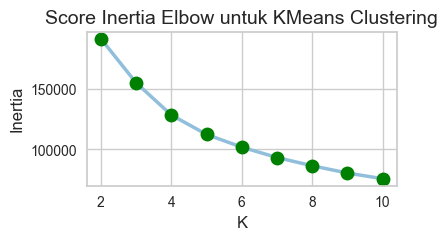

In [36]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(4, 2))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='green', markersize=10)
plt.title('Score Inertia Elbow untuk KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

**Intepretasi**

Berdasarkan grafik tidak terlihat patahan yang tajam sehingga nilai k optimal untuk clustering tidak telihat dengan pasti karena jarak tiap cluster cukup rapat satu dengan lainnya. Oleh karena itu perlu digabung dengan analisis lainnya yakni distortion score untuk melihat letak elbownya berdasar pada rata - rata square distances cluster dengan cluster centernya.

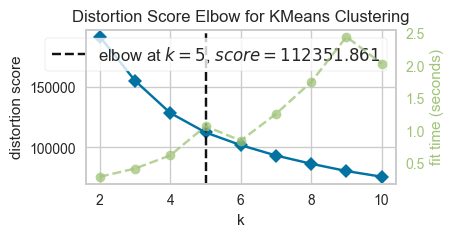

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(4, 2))

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_model_std)       
visualizer.show() 

**Intepretasi**

Berdasarkan distortion score dapat diketahui bahwa elbow atau k optimal terdapat pada k = 5. Oleh karena itu kita akan membuat 5 cluster dengan K-means.

**3.b. Membuat model clustering dengan K-Means**

In [39]:
from sklearn.cluster import KMeans

# fitting model
kmeans = KMeans(n_clusters = 5, random_state = 0)
kc = kmeans.fit(df_model_std)
cluster_labels = kc.labels_

# Menambah kolom cluster
df_cluster = df_model_std.assign(Cluster = cluster_labels)
df_cluster.head()

,Loyalty,Recency,Frequency,Miles,Coupon,Cluster
0,-0.168378,-0.985107,4.087429,4.974117,1.181640,2
1,-0.383538,-0.974441,0.352466,4.823272,0.908199,2
2,1.194306,-0.867782,4.416984,5.014199,0.605326,2
3,1.373607,-0.963775,2.879058,4.837271,0.740300,2
4,0.333664,-1.001106,4.307132,4.721842,0.832167,2


**3.c. Evaluasi Cluster dengan PCA dan visualisasi**

In [40]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_cluster)
pcs = pca.transform(df_cluster)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['Cluster'] = df_cluster['Cluster']
df_pca

,PC 1,PC 2,Cluster
0,-1.034263,5.968550,2
1,-0.656512,3.529923,2
2,-0.492549,6.418358,2
3,-0.355202,5.451443,2
4,-0.777616,6.057363,2
...,...,...,...
53936,1.736750,-0.361827,1
53937,1.437351,-0.769263,1
53938,2.933802,-1.924944,0
53939,3.010661,-1.328355,0


Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

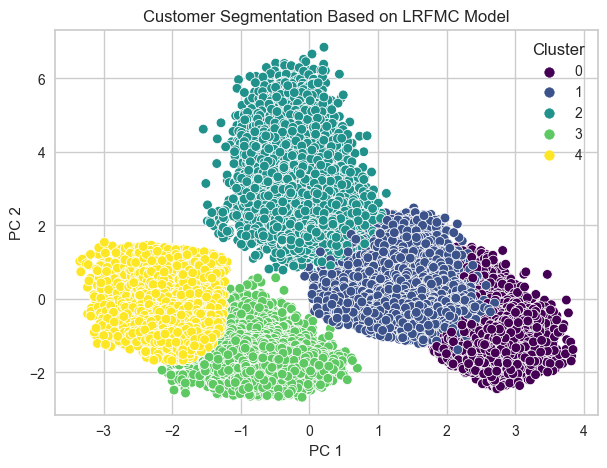

In [42]:
# Visualisasi Hasil Clustering dengan Scatterplot

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="Cluster", palette='viridis')
plt.title('Customer Segmentation Based on LRFMC Model')

# Intepretasi Cluster dan Rekomendasi Bisnis

**4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan**

- a.	Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

- b.	Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster

- c.	Berdasarkan cluster tersebut, berikan 1-2 rekomendasi strategi bisnis untuk stakeholder!


**4.a. Tempelkan label cluster ke dataframe asal dan keluarkan fitur statistik**

In [43]:
# Label cluster sudah ditempelkan pada dataframe LFRMC pada pembuatan model 
# Sehingga hanya perlu ditampilkan fitur statistiknya saja
df_fitur_baru['Cluster'] = kmeans.labels_
display(df_fitur_baru.groupby('Cluster').agg(['mean','median','min','max']))


Loyalty                     Recency                   Frequency  \
              mean median min  max        mean median  min  max       mean   
Cluster                                                                      
0        34.228464   29.0  12  114  254.326944  234.0    1  727   4.348865   
1        82.512818   81.0  53  114  120.597636   96.0    1  560   8.278092   
2        55.873379   53.0  12  114   47.634824   23.0    1  581  27.573432   
3        41.465487   35.0  12  114  496.171009  502.0  164  727   3.703073   
4        29.184438   27.0  12   65   98.440616   77.0    1  431   9.048194   

                               Miles                          Coupon  \
        median min max          mean   median   min    max      mean   
Cluster                                                                
0          4.0   2  20   6806.217118   5409.0   716  48928  0.493201   
1          7.0   2  29  11695.583985  10266.5   368  49671  0.717310   
2         26.0   4  53  39351.523816  36980.0  6992  79843  0.719723   
3          3.0   2  23   5473.323536   4140.5   368  48928  0.795456   
4          8.0   2  31  12606.512478  11339.0   368  50964  0.748990   

                                       
           median       min       max  
Cluster                                
0        0.501953  0.171508  0.705000  
1        0.710000  0.288942  1.270576  
2        0.713138  0.339656  1.270564  
3        0.785638  0.423573  1.276430  
4        0.735751  0.458990  1.277526

**Jumlah, persentase, dan visualisasi customer tiap cluster-nya**

In [44]:
# persentase customer setiap cluster
count_cluster = df_fitur_baru['Cluster'].value_counts().reset_index()
count_cluster.columns = ['Cluster', 'count']
count_cluster['percentage (%)'] = round((count_cluster['count']/len(df_cluster))*100,2)
count_cluster = count_cluster.sort_values(by=['Cluster']).reset_index(drop=True)
count_cluster

,Cluster,count,percentage (%)
0,0,9078,16.83
1,1,12014,22.27
2,2,7558,14.01
3,3,8982,16.65
4,4,16309,30.23


Text(0, 0.5, 'Percentage')

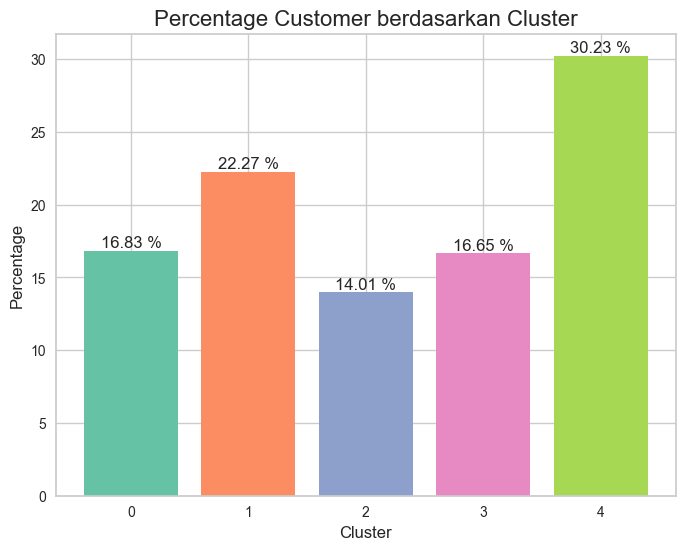

In [46]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(8,6))

c = sns.color_palette("Set2")
bars = plt.bar(x=count_cluster['Cluster'], height= count_cluster['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage Customer berdasarkan Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

**4.b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster**

**Analisis Segmentasi LFRMC pada tiap Clusternya**

Text(0, 0.5, 'Value')

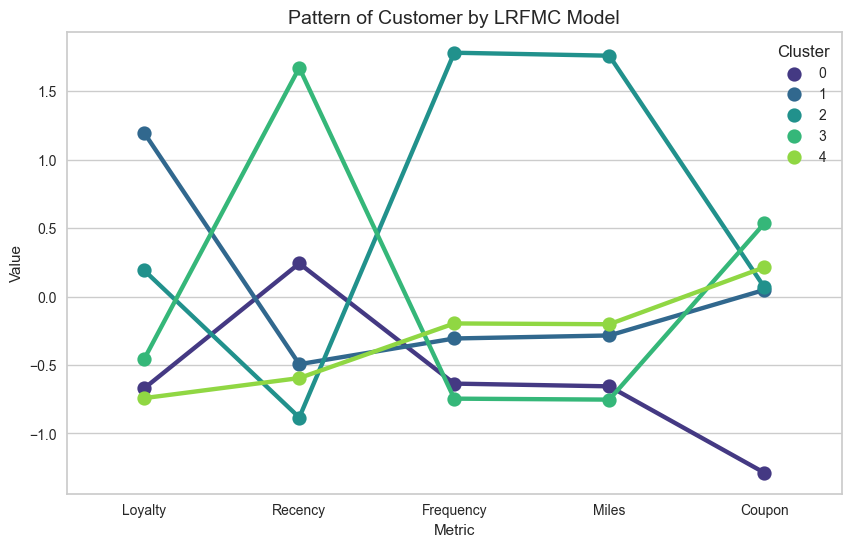

In [47]:
# melihat pola LRFMC pada setiap cluster
cluster_med=df_cluster.groupby('Cluster').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='Cluster', value_vars=['Loyalty', 'Recency', 'Frequency','Miles','Coupon'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster', palette='viridis')
plt.title('Pattern of Customer by LRFMC Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

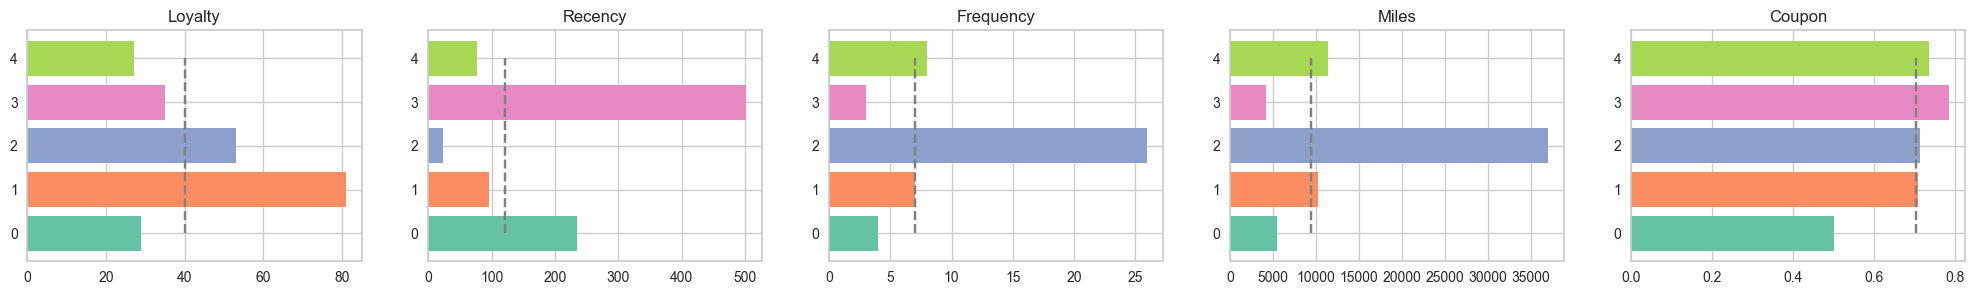

In [48]:
# melihat rata-rata variabel LRFMC antar tiap-tiap cluster
LRFMC= ['Loyalty','Recency','Frequency','Miles','Coupon']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_fitur_baru[col].median(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = df_fitur_baru.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c) 
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

**Intepretasi**

Berdasarkan pola dan nilai rata-rata LFRMC yang ada maka tiap customer yang terwakili dengan tiap cluster memiliki karakteristik yakni :

   

<p style="text-align: center;">

</p> 

|  Cluster  | High | Medium | Low |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** |  | Recency | Loyalty, Miles, Frequency, dan Coupon |
| **Cluster 1** | Loyalty | Frequency, Miles, dan Coupon  | Recency |
| **Cluster 2** | Frequency dan Miles | Coupon dan Loyalty  | Recency |
| **Cluster 3** | Recency dan Coupon |  | Loyalty, Frequency, dan Miles |
| **Cluster 4** |  | Frequency, Miles, Coupon| Loyalty dan Recency |

**Penjelasan tiap - tiap cluster dalam klasifikasi customer:**

- **Cluster 0 (Price Sensitive Customer) :** Costumer ini melakukan penerbangan terakhir dengan jangka waktu yang cukup lama, baru bergabung menjadi member, tingkat frekuensi penerbangan yang dilalui sedikit, dan jarang mendapat kupon atau diskon. Costumer ini berorientasi pada harga jadi jika kupon diskon sedikit maka customer ini cenderung tidak akan melakukan penerbangan di maskapai ini.


- **Cluster 1 (Loyal Customer) :** Customer yang telah menjadi member dalam jangka waktu terlama, memiliki frekuensi penerbangan sedang, jarak tempuh penerbangan yang dilalui cukup lumayan, dan tidak terlalu sering menggunakan maskapai dalam waktu berdekatan.


- **Cluster 2 (Champion Customer) :** Costumer yang paling sering menggunakan maskapai penerbangan dan paling jauh jarak penerbanganya dibanding costumer lain. Hal ini menunjukan bahwa costumer ini memiliki kemungkinan menghasilkan revenue yang besar karena frekuensi penerbangan yang tinggi disertai dengan jarak yang jauh tiap travelnya, hal ini berarti harga tiket yang dibeli pastilah mahal. Costumer ini juga memiliki rentang waktu melakukan penerbangan lagi yang tidak jauh dan merupakan member yang cukup lama di maskapai.


-  **Cluster 3 (About To Sleep Customer) :** Costumer yang belum melakukan penerbangan di maskpai dalam jangka waktu yang lama, frekuensi penerbangan yang sedikit, jarak tempuh penerbangan yang dilalui relatif dekat atau tidak jauh, walaupun mendapat coupon diskon yang cukup banyak dari maskapai.


-  **Cluster 4 (New Costumer) :** Customer yang baru-baru ini menggunakan maskapai penerbangan. Hal tersebut dapat terlihat dari tingkat recency yang sedang, waktu bergabung menjadi member belum lama, Frekuensi menggunakan maskapai penerbangan, jarak tempuh penerbangan yang rendah, dan kupon diskon yang didapatkan cukup banyak.

**4.c. Rekomendasi bisnis untuk stakeholder berdasarkan model clustering costumer yang telah dibuat**

**A. Cluster 0 - Price Sensitive Customer**

Kelompok Customer yang dalam jangka waktu yang cukup lama tidak menggunakan maskapi penerbangan, hal ini dapat terjadi karena berbagai macam alasan.Salah satunya yang sudah dijabarkan diatas bahwa mungkin terdapat pengaruh pemberian kupon diskon yang rendah sehingga menurut customer harga penerbangan mahal. Oleh karena itu, dibutuhkan perlakuan yang dipersonalisasikan dengan keinginan dan kebutuhan costumer.

- **Rekomendasi Bisnis yang perlu dilakukan :**
  - Mengirimkan newsletter tentang diskon dan program penerbangan yang bermanfaat.
  - Meningkatkan dan memberikan  nilai kupon dan diskon yang lebih banyak.

**B. Cluster 1 - Loyal Customer**

Kelompok customer yang telah lama memakai jasa maskapai penerbangan dan memiliki kepuasan atas layanan dan servis yang diberikan. Hal ini membuat mereka loyal dan tidak mencari alternatif maskapai lainnya. Tindakan utama yang perlu dilakukan adalah pemberian penghargaan dan pelayanan berlebih atas loyalitas mereka.

- **Rekomendasi Bisnis yang perlu dilakukan :**
  - Memberikan reward atau poin atas sikap loyalitas mereka yang nantinya dapat digunakan untuk memperoleh hadiah seperti kupon diskon, tiket pesawat, atau produk afiliasi lainnya.
  - Memberikan layanan dan kemudahan prioritas yang lebih baik
  - Meminta kritik dan saran kepada loyal customer agar customer merasa lebih nyaman.


**C. Cluster 2 - Champion Customer**

Kelompok Customer yang sering menggunakan maskapai penerbangan dengan jarak tiap travel-nya yang jauh. Customer ini dapat menjadi kontributor utama dalam meningkatkan  revenue perusahaan baik secara monetary maupun marketing (word of mouth). Customer pada kelompok ini harus diperlakukan dengan istimewa dan hati hati agar nantinya dapat bertahan  lama atau loyal.

- **Rekomendasi Bisnis yang perlu dilakukan :**
  - Meningkatkan dan menjaga kepuasan customer dengan cara menjaga hubungan baik. Hal ini dapat dilakukan dengan membantu customer ini lewat travel support.
  - Memberikan kupon diskon dan marchendise untuk penerbangan yang dilakukan pada jangka waktu tertentu.
  - Memberikan diskon yang lebih besar apabila customer mengajak orang lain untuk penerbangan bersama.
  - Memberikan point atau reward pada jangka waktu tertentu apabila masih menjadi member.


**D. Cluster 3 - About to Sleep Customer**

Kelompok Customer yang tidak membeli dan melakukan penerbangan dalam jangka waktu yang lama tanpa ada kejelasan yang jelas, walaupun sudah diberikan diskon untuk menarik minat transaksi. Kelompok customer ini memeliki kemungkinan besar menjadi lost customer yang akan pindah ke rival perusahaan dan maskapai jika tidak dipastikan customer retentionnya. Oleh karena itu, Perusahaan atau maskapai perlu mengirimkan pesan yang tepat dan relevan untuk menyelesaikan masalah customer dan menarik minat customer untuk melakukan penerbangan di maskapai tersebut.

- **Rekomendasi Bisnis yang perlu dilakukan :**
  - Mengirimkan personal message kepada customer ini agar mengetahui alasan mengapa customer ini tidak melakukan penerbangan di maskapai ini.
  - Mengirim newsletter yang berisi tawaran atau diskon spesial untuk customer yang comeback setelah tidak melakukan penerbangan dalam waktu yang lama agar customer mau kembali lagi.


**E. Cluster 4 - New Customer**

Kelompok customer yang masih baru dalam menggunakan jasa penerbangan maskapai untuk bepergian. Kelompok customer ini perlu dipersiapkan menjadi customer loyalist karena jumlah populasinya yang paling besar diantara kelompok lainnya. Kelompok customer ini perlu dilakukan pemberian diskon dan pengawasan secara berkala agar dapat terlihat ciri-ciri kelompok mana yang akan dituju dan mencegah terjadinya customer churn atau lost customer.

- **Rekomendasi Bisnis yang perlu dilakukan :**
  - Mengirimkan ucapan terima kasih karena sudah melakukan penerbangan
  - Memberikan diskon pada periode tertentu untuk customer baru.